## **The Brewery Problem**

The global beer market is valued at approximately $300 billion, but growth has stagnated in recent years. In Germany, beer consumption has even been declining for over 40 years. In response, the international brewery group BetterBeers has developed six new beers. Your task is to predict how well these beers will perform with customers.

**Objective:**

- Predict the customer rating for each of the six new beers.

- Estimate the prediction uncertainty using the mean squared error (MSE) on the test data.

**Data Overview:**

Three datasets are provided:

- beer_rating_data_train.csv — training data (contains outliers)
- beer_rating_data_test.csv — test data (cleaned)
- beer_rating_data_aim.csv — new beers to predict (cleaned)

Each row represents a single beer and includes the following features:


**Column	Description**
- ABV	Alcohol content (Alcohol by volume, float)
- IBU	Bitterness level (International Bitterness Units, float)
- Rating	Average customer rating (in %, float)
- Brand Awareness	How well-known the beer is (based on a survey, int)
- Style_ale	Ale style indicator (0 = no, 1 = yes)
- Style_lager	Lager style indicator (0 = no, 1 = yes)
- Style_hybrid	Hybrid style indicator (0 = no, 1 = yes)

**Note:**

The CSV files use German formatting:
Columns are separated by semicolons (;)
Decimal points are represented as commas (,)

# **1. Data Cleaning**

In [1]:
############################################
# Read data
############################################

# Import package
import pandas as pd

# File paths for the datasets (with actual file names included)
train_file_path = '/Users/derphantomben/Documents/Coding/Portfolio/Beer Rating/beer_rating_data_train.csv'
test_file_path = '/Users/derphantomben/Documents/Coding/Portfolio/Beer Rating/beer_rating_data_test.csv'
aim_file_path = '/Users/derphantomben/Documents/Coding/Portfolio/Beer Rating/beer_rating_data_aim.csv'

# Importing the datasets and treating 'null' strings as NaN values
df_train = pd.read_csv(train_file_path, sep=';', decimal=',')
df_test = pd.read_csv(test_file_path, sep=';', decimal=',')
df_aim = pd.read_csv(aim_file_path, sep=';', decimal=',')

In [2]:
# Exploring number of rows and columns

print(df_train.shape)
print(df_test.shape)
print(df_aim.shape)

print('-----------')

(7501, 7)
(913, 7)
(6, 6)
-----------


In [3]:
print('df_train has {} rows and {} columns.'.format(*df_train.shape))
display(df_train)
print('--------')
print('df_test has {} rows and {} columns.'.format(*df_test.shape))
display(df_test)
print('--------')
print('df_aim has {} rows and {} columns.'.format(*df_aim.shape))
display(df_aim)

df_train has 7501 rows and 7 columns.


,ABV,IBU,Rating,BrandAwareness,Style_ale,Style_lager,Style_hybrid
0,5.0,NaN,65.3,15698,0,1,0
1,5.5,50.0,62.8,12433,1,0,0
2,4.8,35.0,70.7,5364,0,1,0
3,4.5,30.0,64.5,3228,1,0,0
4,NaN,NaN,58.8,218,0,1,0
...,...,...,...,...,...,...,...
7496,5.2,21.0,67.7,15202,0,0,1
7497,7.2,NaN,75.3,6653,0,1,0
7498,8.5,NaN,90.5,6103,1,0,0
7499,8.0,70.0,75.1,15408,1,0,0


--------
df_test has 913 rows and 7 columns.


,ABV,IBU,Rating,Brand Awareness,Style_ale,Style_lager,Style_hybrid
0,4.7,25.0,67.4,6580,0,1,0
1,8.0,87.0,70.9,5029,1,0,0
2,10.6,55.0,86.9,2117,1,0,0
3,6.2,58.0,76.8,7289,1,0,0
4,8.6,65.0,73.9,3985,1,0,0
...,...,...,...,...,...,...,...
908,6.5,70.0,66.6,9633,1,0,0
909,6.6,80.0,70.9,2780,1,0,0
910,5.3,25.0,74.2,25887,1,0,0
911,7.0,60.0,66.1,12910,1,0,0


--------
df_aim has 6 rows and 6 columns.


,ABV,IBU,Brand Awareness,Style_ale,Style_lager,Style_hybrid
0,11.1,122.0,21725,1,0,0
1,5.8,26.0,37834,0,1,0
2,9.0,30.0,46513,1,0,0
3,8.5,38.0,12039,1,0,0
4,9.2,104.0,29153,1,0,0
5,8.0,68.0,24851,1,0,0


In [4]:
##########################################
# Data Preparation: Transformation and Imputation
##########################################

# Summary statistics for all three data sets
print('df_train.describe:')
display(df_train.describe())
print('-------------------')
print('df_test.describe:')
display(df_test.describe())
print('-------------------')
print('df_aim.describe:')
display(df_aim.describe())
##########################################
# Print dtypes for each data set
print('-------------------')
print('df_train.dtypes:')
display(df_train.dtypes)
print('-------------------')
print('df_test.dtypes:')
display(df_test.dtypes)
print('-------------------')
print('df_aim.dtypes:')
display(df_aim.dtypes)
print('-------------------')

df_train.describe:


,IBU,BrandAwareness,Style_ale,Style_lager,Style_hybrid
count,3842.000000,7501.000000,7501.000000,7501.000000,7501.000000
mean,45.738938,14435.057459,0.817891,0.150113,0.029196
std,32.090373,26768.195698,0.385960,0.357206,0.168367
min,2.000000,1.000000,0.000000,0.000000,0.000000
25%,23.000000,2807.000000,1.000000,0.000000,0.000000
50%,40.000000,6462.000000,1.000000,0.000000,0.000000
75%,65.000000,14714.000000,1.000000,0.000000,0.000000
max,1000.000000,449157.000000,1.000000,1.000000,1.000000


-------------------
df_test.describe:


,ABV,IBU,Rating,Brand Awareness,Style_ale,Style_lager,Style_hybrid
count,913.00000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000
mean,6.93908,44.674699,73.556298,13947.665936,0.855422,0.111720,0.032859
std,2.12525,27.783554,5.390015,15080.404204,0.351868,0.315194,0.178364
min,0.50000,1.000000,54.800000,117.000000,0.000000,0.000000,0.000000
25%,5.30000,22.000000,69.900000,4061.000000,1.000000,0.000000,0.000000
50%,6.40000,37.000000,73.200000,7957.000000,1.000000,0.000000,0.000000
75%,8.00000,65.000000,76.800000,18265.000000,1.000000,0.000000,0.000000
max,19.90000,250.000000,94.000000,74640.000000,1.000000,1.000000,1.000000


-------------------
df_aim.describe:


,ABV,IBU,Brand Awareness,Style_ale,Style_lager,Style_hybrid
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.0
mean,8.600000,64.666667,28685.833333,0.833333,0.166667,0.0
std,1.730896,40.628397,12181.882259,0.408248,0.408248,0.0
min,5.800000,26.000000,12039.000000,0.000000,0.000000,0.0
25%,8.125000,32.000000,22506.500000,1.000000,0.000000,0.0
50%,8.750000,53.000000,27002.000000,1.000000,0.000000,0.0
75%,9.150000,95.000000,35663.750000,1.000000,0.000000,0.0
max,11.100000,122.000000,46513.000000,1.000000,1.000000,0.0


-------------------
df_train.dtypes:


ABV                object
IBU               float64
Rating             object
BrandAwareness      int64
Style_ale           int64
Style_lager         int64
Style_hybrid        int64
dtype: object

-------------------
df_test.dtypes:


ABV                float64
IBU                float64
Rating             float64
Brand Awareness      int64
Style_ale            int64
Style_lager          int64
Style_hybrid         int64
dtype: object

-------------------
df_aim.dtypes:


ABV                float64
IBU                float64
Brand Awareness      int64
Style_ale            int64
Style_lager          int64
Style_hybrid         int64
dtype: object

-------------------


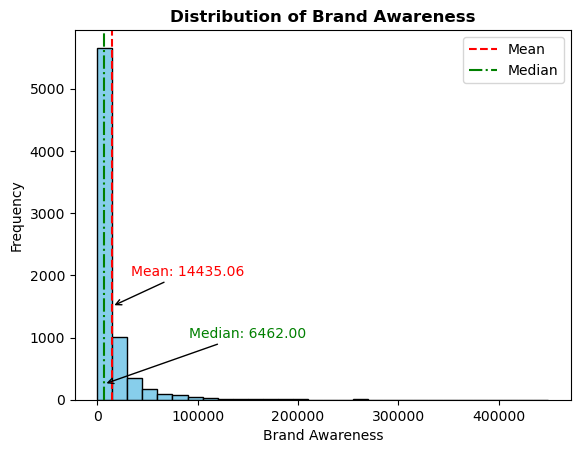

In [5]:
# Note:
# For 'Brand Awareness' in df_train the mean (14435.06) and median (6462.00) differ signifcantly which
# suggests that the distribution of Brand Awareness is positively skewed, with some higher values (outliers)
# pulling the mean higher than the median.

###############################################
# Visualize df_train in histogram
###############################################

# Import package
import matplotlib.pyplot as plt
import numpy as np
# Plotting the histogram
plt.hist(df_train['BrandAwareness'], bins=30, color='skyblue', edgecolor='black')
###############################################
# Layout
# Plot mean and median lines
mean_value = df_train['BrandAwareness'].mean()
median_value = df_train['BrandAwareness'].median()
plt.axvline(mean_value, color='r', linestyle='--'
, label='Mean')
plt.axvline(median_value, color='g', linestyle='-.', label='Median')
# Define labels and title
plt.xlabel('Brand Awareness')
plt.ylabel('Frequency')
plt.title('Distribution of Brand Awareness', fontweight = 'bold')
# Add legend
plt.legend()

# annotations with arrows
plt.annotate('Mean: {:.2f}'
.format(mean_value),
xy=(mean_value, 1500),
xytext=(90000, 2000),
arrowprops=dict(facecolor='red', arrowstyle='->'),
color='r', fontsize=10, ha='center')
plt.annotate('Median: {:.2f}'
.format(median_value),
xy=(median_value, 250),
xytext=(150000, 1000),
arrowprops=dict(facecolor='green', arrowstyle='->'),
color='g', fontsize=10, ha='center')
###############################################
# Show plot
plt.show()

In [6]:
# Columns ABV and Rating for df_train need to be converted to float as described in the info
# Convert 'Rating' column to float
df_train['Rating'] = df_train['Rating'].astype(float)
# Convert 'ABV' column to float
df_train['ABV'] = df_train['ABV'].astype(float)
# Check the updated data types
print(df_train.dtypes)

ABV               float64
IBU               float64
Rating            float64
BrandAwareness      int64
Style_ale           int64
Style_lager         int64
Style_hybrid        int64
dtype: object


In [7]:
# Column brand awereness for df_aim needs to be converted to float as described in the info
# Convert 'Rating' column to float
df_aim['Brand Awareness'] = df_aim['Brand Awareness'].astype(float)
# Check the updated data types
print(df_aim.dtypes)

ABV                float64
IBU                float64
Brand Awareness    float64
Style_ale            int64
Style_lager          int64
Style_hybrid         int64
dtype: object


In [8]:
# Check the number of NaN values in each row
nan_counts = df_train.isnull().sum(axis=1)
# Display the counts of NaN values
print("Number of NaN values in each row:")
print(nan_counts)

Number of NaN values in each row:
0       1
1       0
2       0
3       0
4       2
       ..
7496    0
7497    1
7498    1
7499    0
7500    0
Length: 7501, dtype: int64


In [9]:
# Count total rows with NaN values
total_rows_with_nan = df_train.isnull().any(axis=1).sum()
# Display the result
print("Total rows with NaN values:", total_rows_with_nan)

Total rows with NaN values: 3738


In [10]:
###########################################################################
# Impute NaN separately depending if categorical column or numerical column
###########################################################################

# Import package
#import pandas as pd
from sklearn.impute import SimpleImputer
# Define which columns are numerical and which categorical
numerical_columns = ['ABV', 'IBU', 'Rating', 'BrandAwareness']
categorical_columns = ['Style_ale', 'Style_lager', 'Style_hybrid']

# Replace NaN in numerical columns using the median
#imputer = SimpleImputer(strategy='median')
#df_train[numerical_columns] = imputer.fit_transform(df_train[numerical_columns])

# Replace NaN values in categorical columns using the mode
imputer = SimpleImputer(strategy='most_frequent')
df_train[categorical_columns] = imputer.fit_transform(df_train[categorical_columns])

# Note: In scikit-learn's 'SimpleImputer', the fit_transform method is used to both fit the imputer to the data
# (calculate the imputation strategy based on the data) and perform the imputation (replace missing values
# with the calculated strategy).
###########################################################################
# Alternative: KNN (K-Nearest Neighbors) imputation as an alternative approach to impute missing values
from sklearn.impute import KNNImputer

# Instantiate the KNNImputer with the desired number of neighbors
knn_imputer = KNNImputer(n_neighbors=5)

# Impute the missing values in the numerical columns
df_train[numerical_columns] = knn_imputer.fit_transform(df_train[numerical_columns])
###########################################################################
# Review the dataset after handling missing values and outliers
display(df_train)

,ABV,IBU,Rating,BrandAwareness,Style_ale,Style_lager,Style_hybrid
0,5.00,29.0,65.3,15698.0,0,1,0
1,5.50,50.0,62.8,12433.0,1,0,0
2,4.80,35.0,70.7,5364.0,0,1,0
3,4.50,30.0,64.5,3228.0,1,0,0
4,5.86,41.8,58.8,218.0,0,1,0
...,...,...,...,...,...,...,...
7496,5.20,21.0,67.7,15202.0,0,0,1
7497,7.20,48.0,75.3,6653.0,0,1,0
7498,8.50,44.6,90.5,6103.0,1,0,0
7499,8.00,70.0,75.1,15408.0,1,0,0


# **2. EDA**

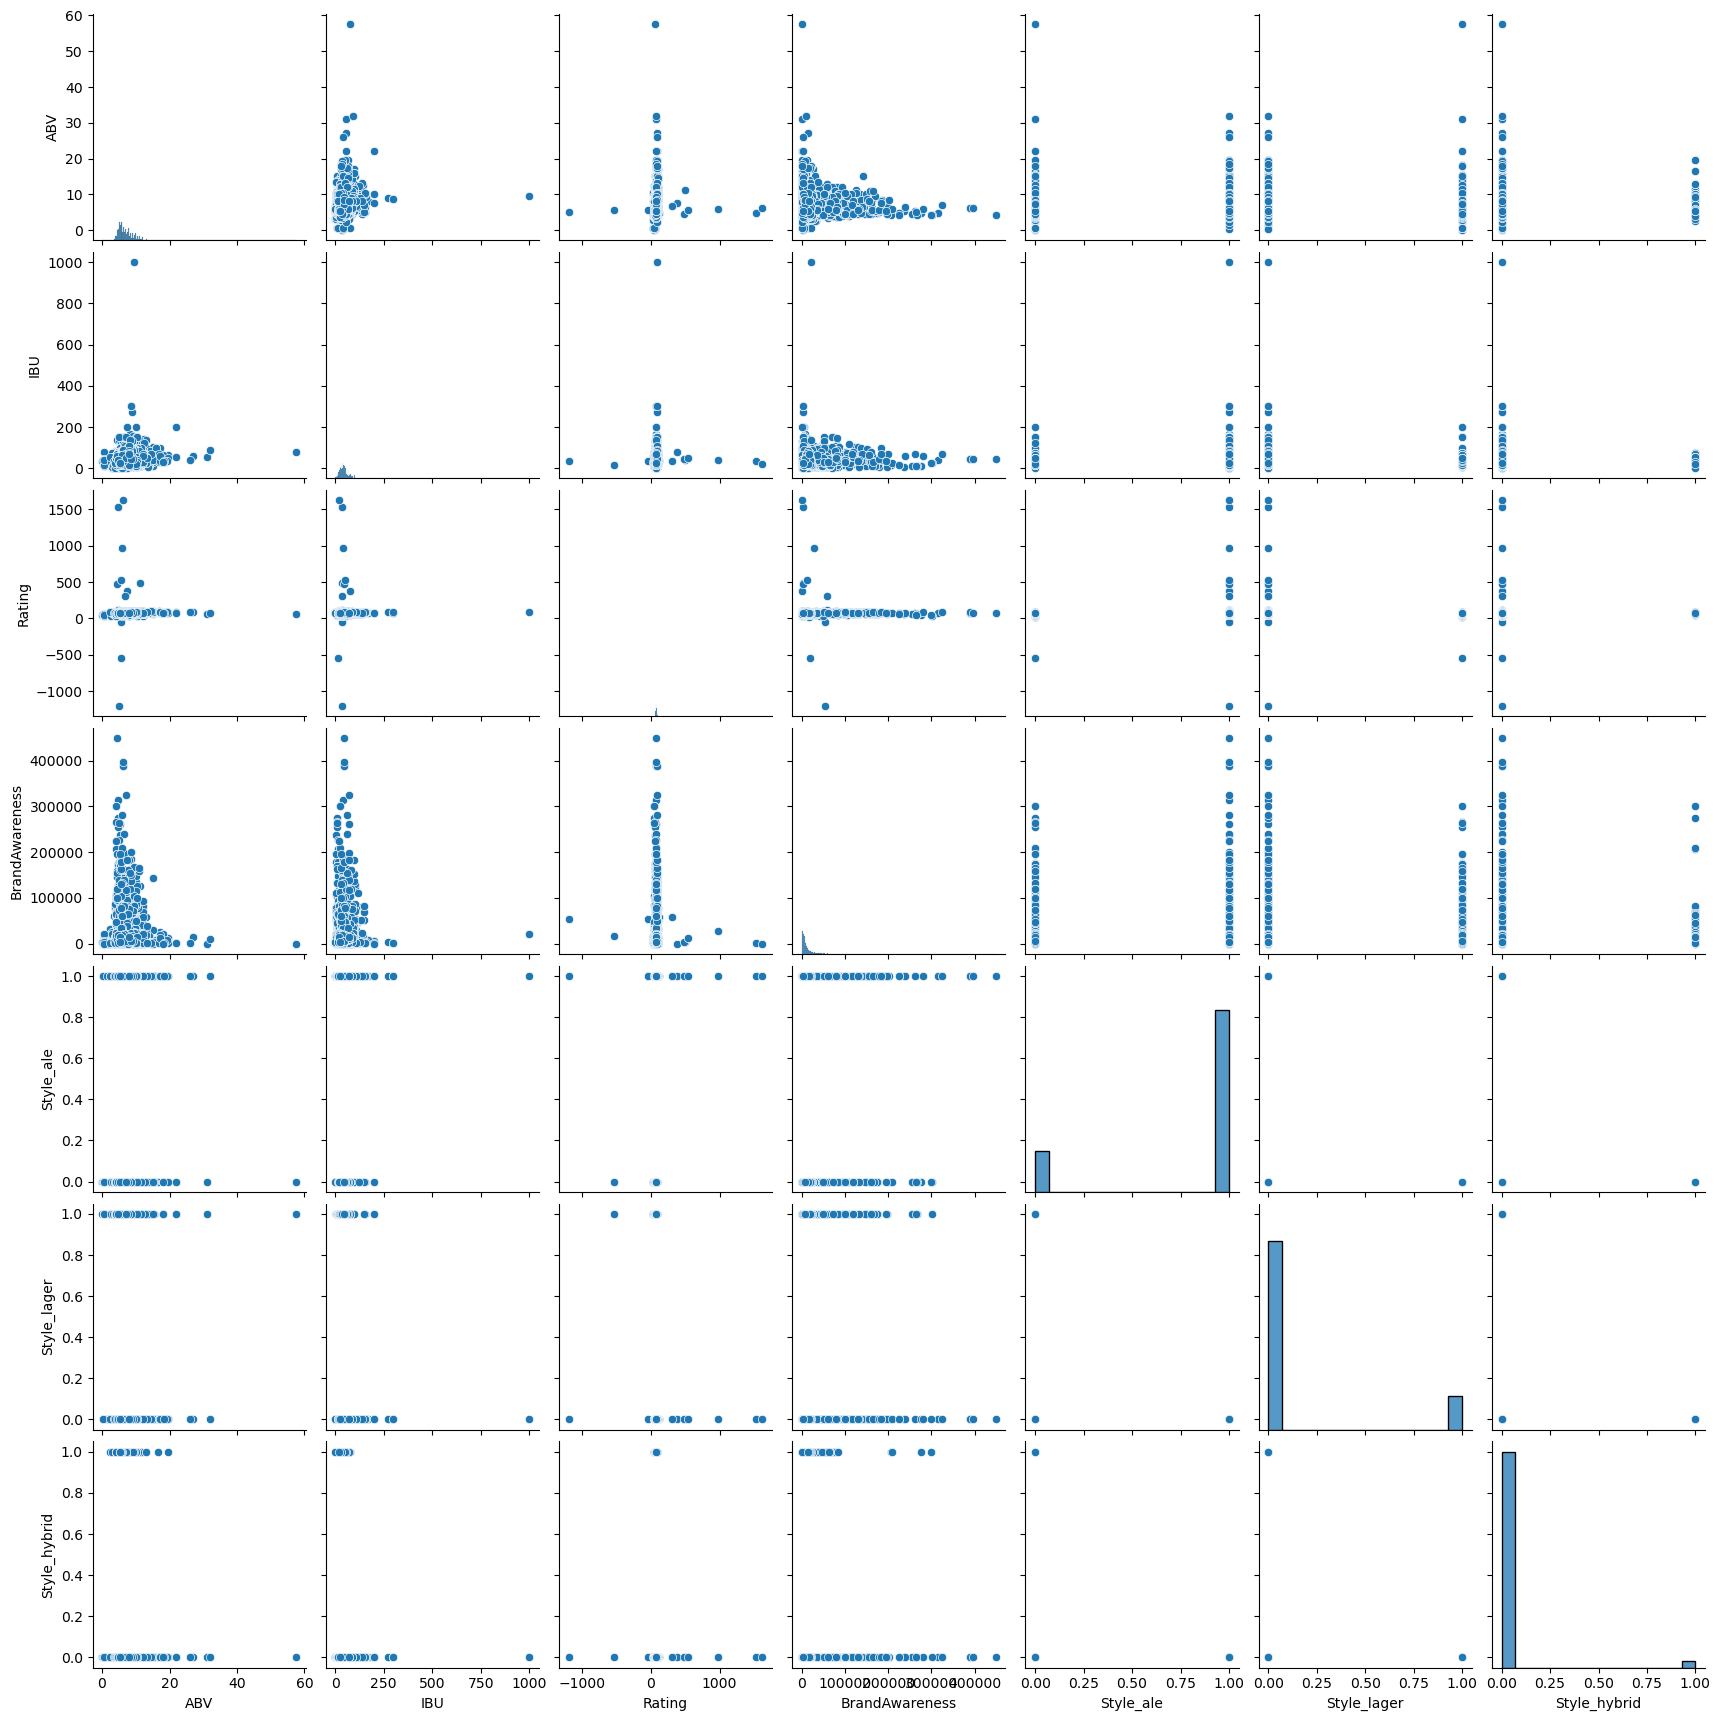

In [11]:
# EDA: Outlier detection and correlation check

# Import package
import seaborn as sns
sns.pairplot(df_train)

In [12]:
# Data Preparation: Deal with Outliers
#################################################

# Calculate IQR for definition of upper/lower thresholds
# Calculate the first (Q1) and thrid quartiles (Q3)
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#################################################
# Identify outliers via boolean masking
outliers = ((df_train < lower_bound) | (df_train > upper_bound)).any(axis=1)

# Display outliers
outliers_df = df_train[outliers]
print("Outliers:")
display(outliers_df)

# Calculate sum of rows with outliers
sum_outliers = outliers.sum()
#################################################
# Display the sum
print('Sum of rows with outliers:', outliers.sum())
print('For comparison -> df_train has {} rows and {} columns.'.format(*df_train.shape))
# Handle outliers (e.g., remove or replace them)
# For example, you can remove outliers from the DataFrame
# df_train_no_outliers = df_train[~outliers]

Outliers:


,ABV,IBU,Rating,BrandAwareness,Style_ale,Style_lager,Style_hybrid
0,5.00,29.0,65.3,15698.0,0,1,0
2,4.80,35.0,70.7,5364.0,0,1,0
4,5.86,41.8,58.8,218.0,0,1,0
5,4.50,29.2,60.5,871.0,0,1,0
7,6.00,40.2,67.1,35040.0,1,0,0
...,...,...,...,...,...,...,...
7487,5.00,26.6,58.6,3958.0,0,1,0
7491,5.20,33.0,70.2,195582.0,0,1,0
7495,4.60,38.0,73.6,19308.0,0,1,0
7496,5.20,21.0,67.7,15202.0,0,0,1


Sum of rows with outliers: 2346
For comparison -> df_train has 7501 rows and 7 columns.


In [13]:
# Calculate the median for each numerical column
median_values = df_train[numerical_columns].median()

# Define a threshold for identifying outliers (e.g., values beyond 3 standard deviations from the median)
outlier_threshold = 3 # For example, considering values beyond 3 standard deviations as outliers

# Calculate the upper and lower bounds for outliers
upper_bound = median_values + outlier_threshold * df_train[numerical_columns].std()
lower_bound = median_values - outlier_threshold * df_train[numerical_columns].std()

# Replace outliers with the median value
df_train[numerical_columns] = df_train[numerical_columns].mask(
(df_train[numerical_columns] > upper_bound) | (df_train[numerical_columns] < lower_bound),
median_values,
axis=1 # Specify axis=1 to apply the mask column-wise
)
# Display the imputed DataFrame
display(df_train)

,ABV,IBU,Rating,BrandAwareness,Style_ale,Style_lager,Style_hybrid
0,5.00,29.0,65.3,15698.0,0,1,0
1,5.50,50.0,62.8,12433.0,1,0,0
2,4.80,35.0,70.7,5364.0,0,1,0
3,4.50,30.0,64.5,3228.0,1,0,0
4,5.86,41.8,58.8,218.0,0,1,0
...,...,...,...,...,...,...,...
7496,5.20,21.0,67.7,15202.0,0,0,1
7497,7.20,48.0,75.3,6653.0,0,1,0
7498,8.50,44.6,90.5,6103.0,1,0,0
7499,8.00,70.0,75.1,15408.0,1,0,0


**Evaluation**
As amount of outlier rows = 2063 it would significantly shrink df_train --> don't remove

Alternative approaches:
impute outliers --> e.g., replace outliers with the median or mean value of respective column.
This could help to retain valuable data while mitigating the impact of outliers.
transform data --> e.g., log transformation, square root transformation

# **3. ML training and evaluation**

,ABV,IBU,Rating,BrandAwareness,Style_ale,Style_lager,Style_hybrid
ABV,1.000000,0.303121,0.448491,-0.039756,0.253659,-0.238374,-0.074460
IBU,0.303121,1.000000,0.240175,0.070632,0.175275,-0.137548,-0.108601
Rating,0.448491,0.240175,1.000000,0.025010,0.411983,-0.407676,-0.074778
BrandAwareness,-0.039756,0.070632,0.025010,1.000000,0.031339,-0.062582,0.064116
Style_ale,0.253659,0.175275,0.411983,0.031339,1.000000,-0.890658,-0.367518
Style_lager,-0.238374,-0.137548,-0.407676,-0.062582,-0.890658,1.000000,-0.072883
Style_hybrid,-0.074460,-0.108601,-0.074778,0.064116,-0.367518,-0.072883,1.000000


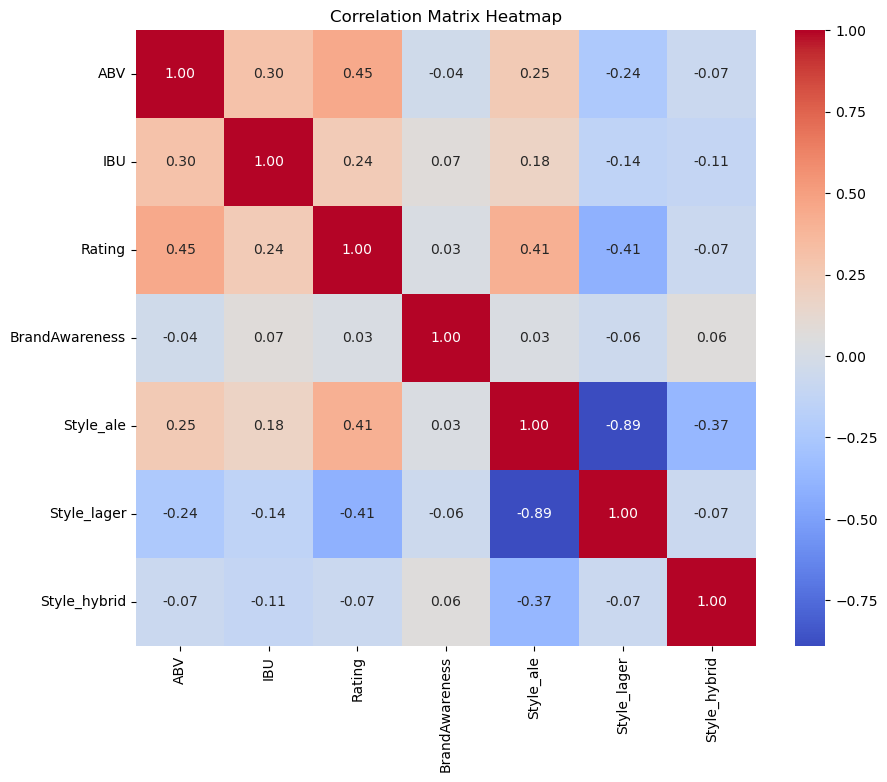

In [14]:
#################################################
# Modelling: Feature Engineering -> Feature Selection
#################################################

# Import package
import seaborn as sns
#import matplotlib.pyplot as plt
####################################################
correlation_matrix = df_train.corr()
display(correlation_matrix)
####################################################
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap')
plt.show()

In [15]:
# Import package
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = df_train[['ABV', 'IBU', 'Style_ale']]
target = df_train['Rating']
# Note: I used ABV and Styl_ale base on correlation matrix + added the styles as style seem to matter
features_train_standardized = scaler.fit_transform(features)

In [16]:
########################################################
# Splitting the dataset into training and testing sets (80% train, 20% test <-- common ratio)
########################################################

# Import package
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features, target,
test_size=0.2, random_state=42)

In [17]:
# Modelling: Instantiate Models and evaluate metrics

# Import package
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RANSACRegressor
from sklearn.metrics import mean_squared_error, r2_score
########################################################
# Initializing and fitting the linear regression model
model_lin = LinearRegression()
model_lin.fit(features_train, target_train)
# Making predictions on the test set
target_pred = model_lin.predict(features_test)
# Evaluating the model
mse_lin = mean_squared_error(target_test, target_pred)
r2_lin = r2_score(target_test, target_pred)

########################################################
# Ridge Regression
ridge_reg = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
ridge_reg.fit(features_train, target_train)
target_pred_ridge = ridge_reg.predict(features_test)
mse_ridge = mean_squared_error(target_test, target_pred_ridge)
r2_ridge = r2_score(target_test, target_pred_ridge)

########################################################
# Lasso Regression
lasso_reg = make_pipeline(StandardScaler(), Lasso(alpha=1.0))
lasso_reg.fit(features_train, target_train)
target_pred_lasso = lasso_reg.predict(features_test)
mse_lasso = mean_squared_error(target_test, target_pred_lasso)
r2_lasso = r2_score(target_test, target_pred_lasso)

########################################################
# Polynomial Regression
poly_reg = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), LinearRegression())
poly_reg.fit(features_train, target_train)
target_pred_poly = poly_reg.predict(features_test)
mse_poly = mean_squared_error(target_test, target_pred_poly)
r2_poly = r2_score(target_test, target_pred_poly)

########################################################
# RANSAC Regression
ransac_reg = make_pipeline(StandardScaler(), RANSACRegressor())
ransac_reg.fit(features_train, target_train)
target_pred_ransac = ransac_reg.predict(features_test)
mse_ransac = mean_squared_error(target_test, target_pred_ransac)
r2_ransac = r2_score(target_test, target_pred_ransac)

########################################################
# Display results
print("Linear Regression:")
print("Mean Squared Error: {:.2f}"
.format(mse_lin))
print("R-squared Score: {:.2f}%".format(r2_lin * 100))
print()
print("Ridge Regression:")
print("Mean Squared Error: {:.2f}"
.format(mse_ridge))
print("R-squared Score: {:.2f}%".format(r2_ridge * 100))
print()
print("Lasso Regression:")
print("Mean Squared Error: {:.2f}"
.format(mse_lasso))
print("R-squared Score: {:.2f}%".format(r2_lasso * 100))
print()
print("Polynomial Regression:")
print("Mean Squared Error: {:.2f}"
.format(mse_poly))
print("R-squared Score: {:.2f}%".format(r2_poly * 100))
print()
print("RANSAC Regression:")
print("Mean Squared Error: {:.2f}".format(mse_ransac))
print("R-squared Score: {:.2f}%".format(r2_ransac * 100))

Linear Regression:
Mean Squared Error: 51.80
R-squared Score: 31.12%

Ridge Regression:
Mean Squared Error: 51.80
R-squared Score: 31.12%

Lasso Regression:
Mean Squared Error: 54.51
R-squared Score: 27.51%

Polynomial Regression:
Mean Squared Error: 51.30
R-squared Score: 31.77%

RANSAC Regression:
Mean Squared Error: 58.69
R-squared Score: 21.95%


**Observation:**
Removing the Nan completely has improved MSE and R2 by nearly 1% for most regression models over replacing them with 0
Note: Imputing with median led to error

In [18]:
########################################################
# Model selection: Testing on test data
# Making predictions on the test data using all four models
########################################################

# Predicting with Linear Regression
test_predictions_lin = model_lin.predict(features_test)

# Predicting with Ridge Regression
test_predictions_ridge = ridge_reg.predict(features_test)

# Predicting with Lasso Regression
test_predictions_lasso = lasso_reg.predict(features_test)

# Predicting with Polynomial Regression
test_predictions_poly = poly_reg.predict(features_test)

# Predicting with RANSAC Regression
test_predictions_ransac = ransac_reg.predict(features_test)

# Calculating Mean Squared Error and R-squared Score for each model
mse_lin = mean_squared_error(target_test, test_predictions_lin)
r2_lin = r2_score(target_test, test_predictions_lin)
mse_ridge = mean_squared_error(target_test, test_predictions_ridge)
r2_ridge = r2_score(target_test, test_predictions_ridge)
mse_lasso = mean_squared_error(target_test, test_predictions_lasso)
r2_lasso = r2_score(target_test, test_predictions_lasso)
mse_poly = mean_squared_error(target_test, test_predictions_poly)
r2_poly = r2_score(target_test, test_predictions_poly)
mse_ransac = mean_squared_error(target_test, test_predictions_ransac)
r2_ransac = r2_score(target_test, test_predictions_ransac)

# Displaying the results
print("Linear Regression:")
print("Mean Squared Error: {:.2f}"
.format(mse_lin))
print("R-squared Score: {:.2f}%".format(r2_lin * 100))
print()
print("Ridge Regression:")
print("Mean Squared Error: {:.2f}".format(mse_ridge))
print("R-squared Score: {:.2f}%".format(r2_ridge * 100))
print()
print("Lasso Regression:")
print("Mean Squared Error: {:.2f}"
.format(mse_lasso))
print("R-squared Score: {:.2f}%".format(r2_lasso * 100))
print()
print("Polynomial Regression:")
print("Mean Squared Error: {:.2f}".format(mse_poly))
print("R-squared Score: {:.2f}%".format(r2_poly * 100))
print()
print("RANSAC Regression:")
print("Mean Squared Error: {:.2f}".format(mse_ransac))
print("R-squared Score: {:.2f}%".format(r2_ransac * 100))

Linear Regression:
Mean Squared Error: 51.80
R-squared Score: 31.12%

Ridge Regression:
Mean Squared Error: 51.80
R-squared Score: 31.12%

Lasso Regression:
Mean Squared Error: 54.51
R-squared Score: 27.51%

Polynomial Regression:
Mean Squared Error: 51.30
R-squared Score: 31.77%

RANSAC Regression:
Mean Squared Error: 58.69
R-squared Score: 21.95%


# **4. ML prediction**

In [19]:
########################################################
# Prediction on aim data
########################################################
# Making predictions on aim data using all four models
aim_features = df_aim[['ABV', 'IBU', 'Style_ale']]

# Predicting with Linear Regression
aim_predictions_lin = model_lin.predict(aim_features)

# Predicting with Ridge Regression
aim_predictions_ridge = ridge_reg.predict(aim_features)

# Predicting with Lasso Regression
aim_predictions_lasso = lasso_reg.predict(aim_features)

# Predicting with Polynomial Regression
aim_predictions_poly = poly_reg.predict(aim_features)

# Predicting with RANSAC Regression
aim_predictions_ransac = ransac_reg.predict(aim_features)

# Displaying the predictions
print("Predictions on aim data using Linear Regression:")
print(aim_predictions_lin)
print("Predictions on aim data using Ridge Regression:")
print(aim_predictions_ridge)
print("Predictions on aim data using Lasso Regression:")
print(aim_predictions_lasso)
print("Predictions on aim data using Polynomial Regression:")
print(aim_predictions_poly)
print("Predictions on aim data using RANSAC Regression:")
print(aim_predictions_ransac)

Predictions on aim data using Linear Regression:
[83.32354603 65.86395172 77.32055146 76.87702519 80.04272489 77.15869042]
Predictions on aim data using Ridge Regression:
[83.32281837 65.86481424 77.31988529 76.87649325 80.04231376 77.1583807 ]
Predictions on aim data using Lasso Regression:
[79.12387549 68.26326319 76.77646369 76.21755612 77.00002672 75.65864854]
Predictions on aim data using Polynomial Regression:
[81.26780123 66.60168999 77.46794624 77.34448679 79.51567001 77.75075801]
Predictions on aim data using RANSAC Regression:
[79.71588414 70.59811156 76.67800707 75.78442006 76.59585156 74.76556119]


In [20]:
########################################################
# Adding predictions to df_aim for comparison
########################################################
# Reasoning
# Keep track of which prediction came from which model, side by side with the input features.
# It makes exporting or visualizing results easier — everything is in one place.
# Easy comparison of predictions across models for the same rows.

df_aim['pred_linear'] = aim_predictions_lin
df_aim['pred_ridge'] = aim_predictions_ridge
df_aim['pred_lasso'] = aim_predictions_lasso
df_aim['pred_poly'] = aim_predictions_poly
df_aim['pred_ransac'] = aim_predictions_ransac

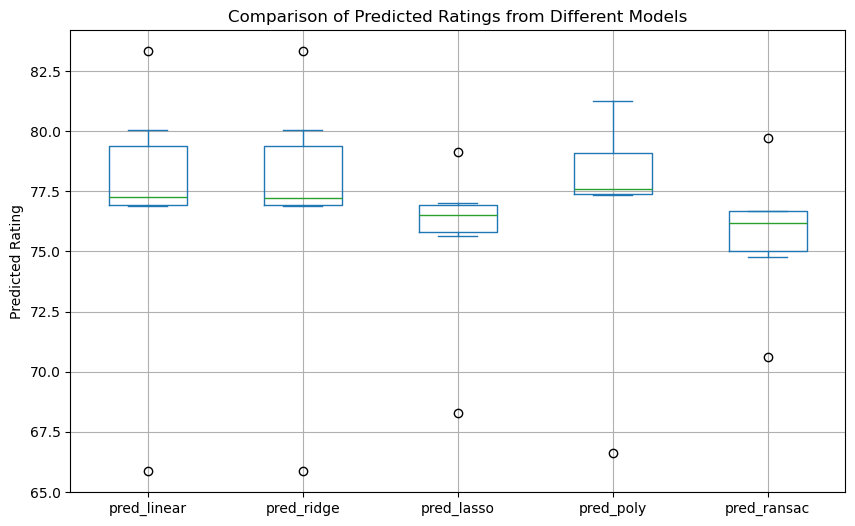

In [21]:
########################################################
# Compare distributions of predictions
########################################################
df_aim[['pred_linear', 'pred_ridge', 'pred_lasso', 'pred_poly', 'pred_ransac']].plot(kind='box', figsize=(10, 6))
plt.title('Comparison of Predicted Ratings from Different Models')
plt.ylabel('Predicted Rating')
plt.grid(True)
plt.show()

**Quick Interpretation**

- RANSAC has the highest average prediction and least skew, offering consistently strong ratings across all samples.
- Linear/Ridge are nearly identical and lean a bit lower, especially on the second value (65.86).
- Lasso is more conservative overall — generally predicting lower ratings, possibly underfitting slightly.
- Polynomial is quite close to the mid-range models but still doesn't reach the upper confidence of RANSAC.

In [22]:
########################################################
#Hyperparameter Tuning: 
########################################################

from sklearn.model_selection import GridSearchCV
params = {'max_trials': [50, 100, 150], 'min_samples': [2, 4, 6]}
ransac_search = GridSearchCV(RANSACRegressor(), param_grid=params, scoring='neg_mean_squared_error')
ransac_search.fit(features_train, target_train)

GridSearchCV(estimator=RANSACRegressor(),
             param_grid={'max_trials': [50, 100, 150],
                         'min_samples': [2, 4, 6]},
             scoring='neg_mean_squared_error')

**Evaluation**

The GridSearchCV has successfully found the best hyperparameters for the RANSAC model. **The best estimator has been set with max_trials=150 and min_samples=6, which means that the model will now use 150 trials and require at least 6 samples for each RANSAC model fit.**

In [23]:
########################################################
# Final Predictions: 
########################################################
# Assign RANSAC predictions to df_aim
df_aim['predicted_rating'] = aim_predictions_ransac

# Display sample predictions
print("Final Predicted Ratings (RANSAC):")
print(df_aim[['predicted_rating']].head())

Final Predicted Ratings (RANSAC):
   predicted_rating
0         79.715884
1         70.598112
2         76.678007
3         75.784420
4         76.595852


In [24]:
########################################################
#Hyperparameter Tuning: 
########################################################

from sklearn.model_selection import GridSearchCV
params = {'max_trials': [50, 100, 150], 'min_samples': [2, 4, 6]}
ransac_search = GridSearchCV(RANSACRegressor(), param_grid=params, scoring='neg_mean_squared_error')
ransac_search.fit(features_train, target_train)

GridSearchCV(estimator=RANSACRegressor(),
             param_grid={'max_trials': [50, 100, 150],
                         'min_samples': [2, 4, 6]},
             scoring='neg_mean_squared_error')

**Evaluation**

The GridSearchCV has successfully found the best hyperparameters for the RANSAC model. **The best estimator has been set with max_trials=150 and min_samples=6, which means that the model will now use 150 trials and require at least 6 samples for each RANSAC model fit.**

Feature Importance Evaluation:
     Feature  Importance
2  Style_ale    3.307721
0        ABV    1.908885
1        IBU    0.020392


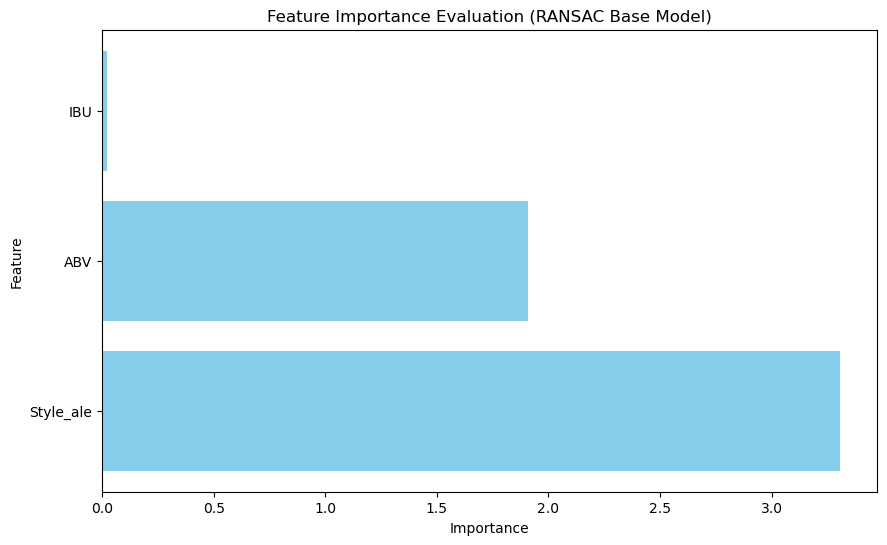

In [25]:
########################################################
# Feature importance
########################################################

# Import package
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt

# Assuming 'ransac_search' has already been fitted

# Extract the coefficients from the base estimator
coefficients = ransac_search.best_estimator_.estimator_.coef_

# DataFrame to store feature names and their importance
feature_importance = pd.DataFrame({
    'Feature': features.columns,
    'Importance': coefficients})

# Sorting features by importance in descending order
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display the sorted importance
print("Feature Importance Evaluation:")
print(feature_importance)

# Visualize the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Evaluation (RANSAC Base Model)')
plt.show()

**Evaluation**

**ABV** and **Style_ale** are the most important features.

In [26]:
# Export predictions to CSV
df_aim.to_csv('final_predictions_ransac.csv', index=False)
print("Predictions exported to 'final_predictions_ransac.csv'")

Predictions exported to 'final_predictions_ransac.csv'
